# Introduction to Neural Networks Project

## Part A

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import tensorflow

from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

### 1.A Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [7]:
signalsDf = pd.read_csv("Signal.csv")
signalsDf.head

<bound method NDFrame.head of       Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
4             7.4        0.700         0.00          1.9        0.076   
...           ...          ...          ...          ...          ...   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0  

In [8]:
signalsDf.shape

(1599, 12)

In [9]:
signalsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
signalsDf.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

### 1.B Check for missing values and print percentage for each attribute.

In [11]:
signalsDf.isna().sum()/len(signalsDf)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [12]:
signalsDf = signalsDf.dropna()

### 1.C Check for presence of duplicate records in the dataset and impute with appropriate method.

In [13]:
# Check number of duplicate records
signalsDf.duplicated().sum()

240

There are 240 dupicate values found.

In [14]:
signals_df = signalsDf.copy()
signals_df.drop_duplicates(keep = 'first', inplace = True)
signals_df.shape

(1359, 12)

### 1.D Visualise distribution of the target variable.

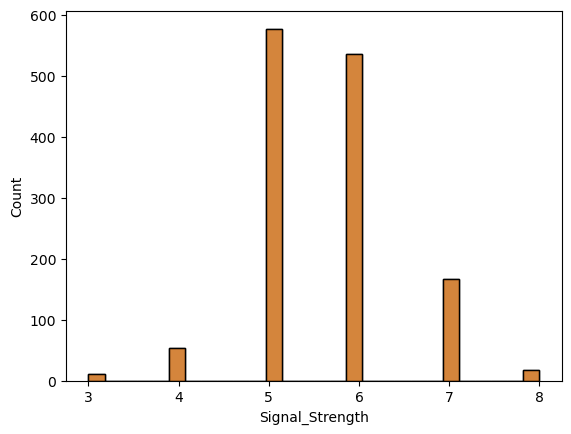

In [106]:
sns.histplot(data = signals_df, x = 'Signal_Strength');
plt.show()

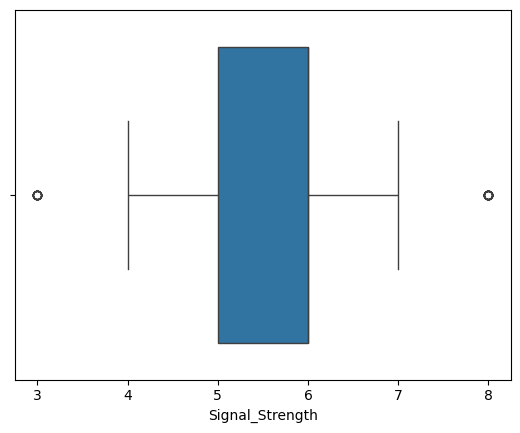

In [107]:
sns.boxplot(data = signals_df, x = 'Signal_Strength');
plt.show()

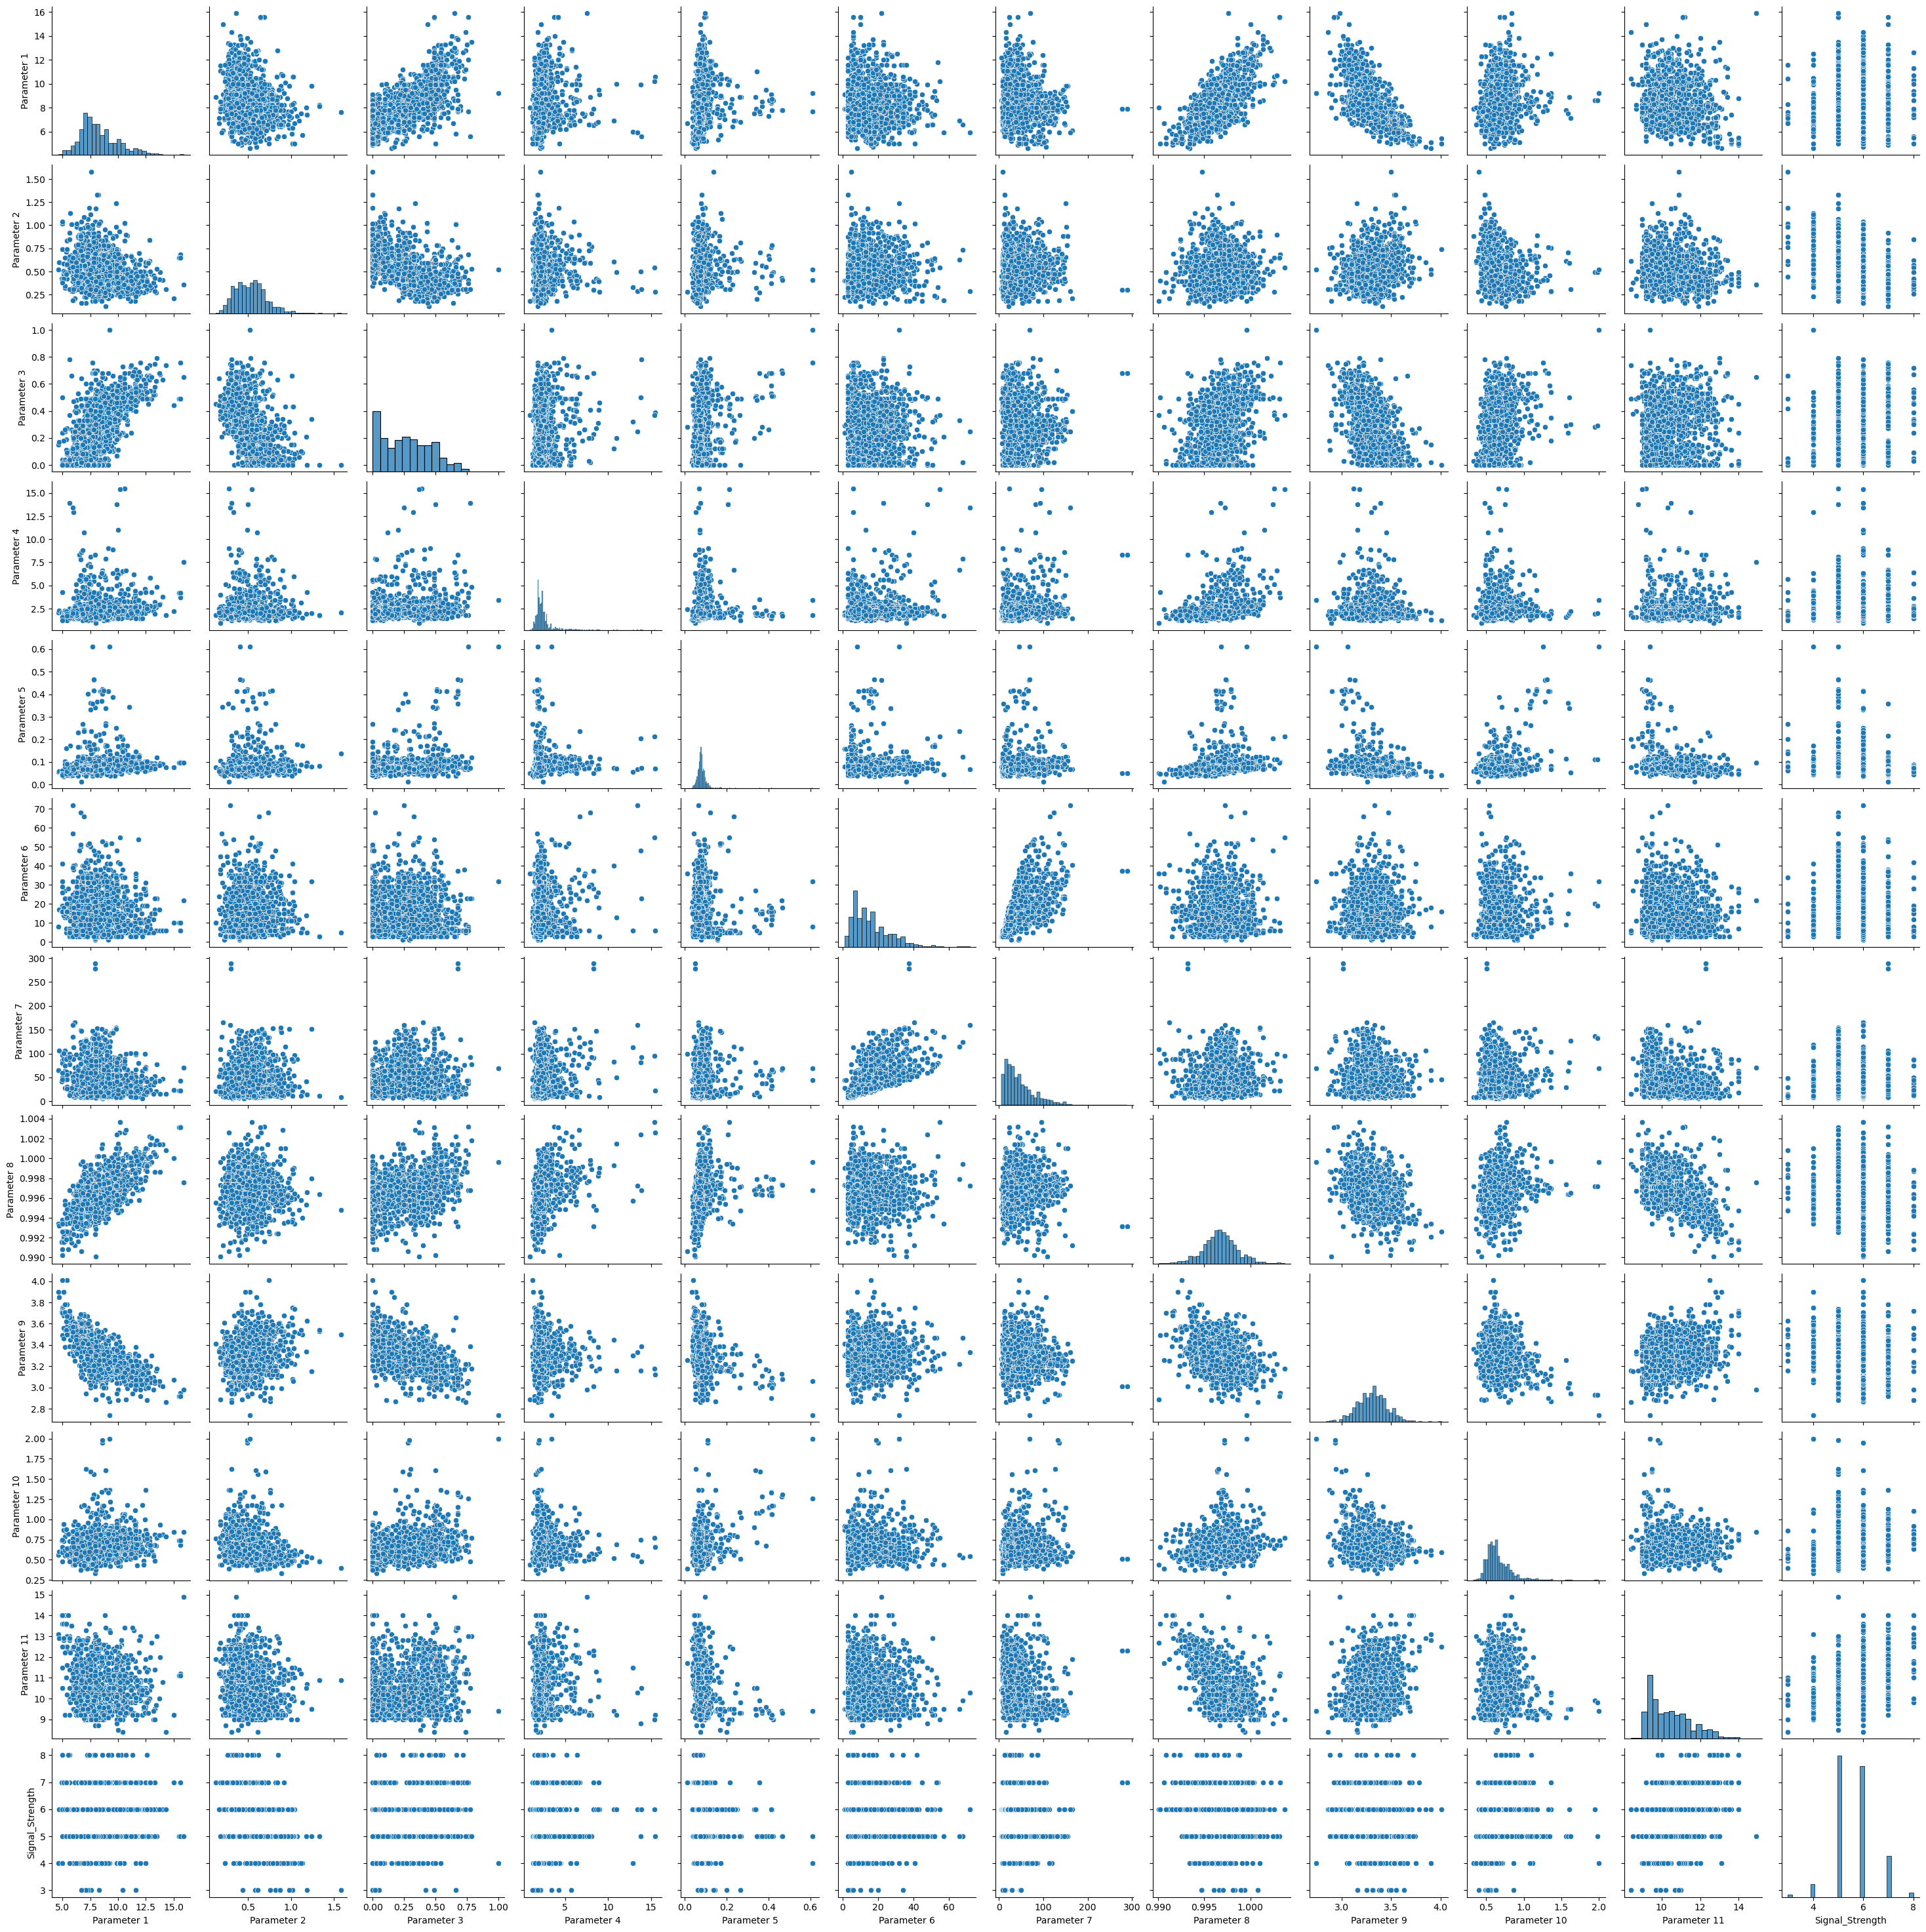

In [108]:
sns.pairplot(data = signals_df);
plt.show()

### 1.E Share insights from the initial data analysis (at least 2).

#### Insights
1. There are 1599 rows and 12 columns in the data frame.
2. All values are numeric only.
3. 240 records found duplicate, cleaned those rows. Leftare 1359 rows in the data frame.
4. The target column Signal Strength contains integer values between 3 to 8.
5. Most of the Signal_Strength are 5 or 6.

### 2.A Split the data into X & Y.

In [18]:
signals_X = signals_df.drop('Signal_Strength', axis = 1)
signals_Y = signals_df['Signal_Strength']

### 2.B Split the data into train & test with 70:30 proportion.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(signals_X, signals_Y, test_size = 0.30, stratify = signals_Y, random_state = 1)

### 2.C Print shape of all the 4 variables and verify if train and test data is in sync.

In [20]:
print('X train:', X_train.shape, '| X test:', X_test.shape, '| Y train:', Y_train.shape, '| Y test:', Y_test.shape)

X train: (951, 11) | X test: (408, 11) | Y train: (951,) | Y test: (408,)


In [21]:
Y_train.value_counts()

Signal_Strength
5    404
6    374
7    117
4     37
8     12
3      7
Name: count, dtype: int64

In [22]:
Y_test.value_counts()

Signal_Strength
5    173
6    161
7     50
4     16
8      5
3      3
Name: count, dtype: int64

### 2.D Normalise the train and test data with appropriate method.

In [23]:
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test))
scaled_X_train.columns = X_train.columns
scaled_X_test.columns = X_test.columns

In [24]:
scaled_X_train.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0     1.402648    -0.150966     0.971389    -0.026726    -0.318863   
1     0.257556    -0.706894     0.662515    -0.240913    -0.185844   
2    -1.288319     1.044280    -0.881856     0.044669    -0.762259   
3     0.085792    -1.374008     1.486179    -0.526496     0.102363   
4    -0.944792    -1.374008     0.044767    -0.098122    -1.671221   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0    -1.029546    -0.578278     1.825417    -1.688235     -0.109826   
1     0.336751     0.174367     0.682066     0.856778     -0.109826   
2    -0.248805    -0.578278    -1.702638     1.705115     -0.970467   
3     1.898233     1.709761     0.083168    -0.056817      0.566391   
4     1.995825     1.619444    -3.325107    -0.317844     -1.646685   

   Parameter 11  
0     -0.861111  
1     -1.142107  
2      1.386859  
3      0.075543  
4      1.199528

In [25]:
scaled_X_test.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0     2.154619    -0.710509     1.893034    -0.277008    -0.376491   
1    -0.127805    -1.500608     0.783252    -0.642899    -0.393721   
2     2.622809     0.342957     1.085920     0.251500    -0.255879   
3     0.047766     0.026918    -0.175196     0.739353    -0.238648   
4    -0.947137     1.001374    -0.931866     2.446841     0.467795   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0    -0.893865    -0.629735     1.125743    -1.587526      0.102980   
1     0.489135     0.051350    -1.042803     0.425952     -0.323035   
2    -1.078265    -0.866635     1.435536    -1.084157     -0.482790   
3    -0.064065     1.887319     0.506159    -0.266181     -0.269783   
4    -0.709465    -0.925859    -0.035978     0.237188     -0.908804   

   Parameter 11  
0      0.752357  
1      1.291386  
2      0.842195  
3     -0.954566  
4      0.303167

### 2.E Transform Labels into format acceptable by Neural Network.

In [26]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

### 3.A Design a Neural Network to train a classifier.

In [27]:
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

In [28]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(scaled_X_train.shape[1],)),
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Regularization
    Dense(Y_train_cat.shape[1], activation='softmax')
])

C:\Users\fenuj\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.B Train the classifier using previously designed Architecture.

In [30]:
history = model.fit(scaled_X_train, Y_train_cat,
                    validation_data=(scaled_X_test, Y_test_cat),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1909 - loss: 1.8551 - val_accuracy: 0.4216 - val_loss: 1.4775
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4193 - loss: 1.4644 - val_accuracy: 0.5564 - val_loss: 1.2556
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4770 - loss: 1.3009 - val_accuracy: 0.5539 - val_loss: 1.1530
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5630 - loss: 1.1310 - val_accuracy: 0.5711 - val_loss: 1.1033
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5271 - loss: 1.1446 - val_accuracy: 0.5662 - val_loss: 1.0765
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5620 - loss: 1.1283 - val_accuracy: 0.5662 - val_loss: 1.0610
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5655 - loss: 1.0931 - val_accuracy: 0.5662 - val_loss: 1.0521
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5493 - loss: 1.1007 - val_accuracy: 0.5809 - v

In [31]:
test_loss, test_accuracy = model.evaluate(scaled_X_test, Y_test_cat)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5277 - loss: 1.0067
Test Loss: 0.9559, Test Accuracy: 0.5858


### 3.C Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy.

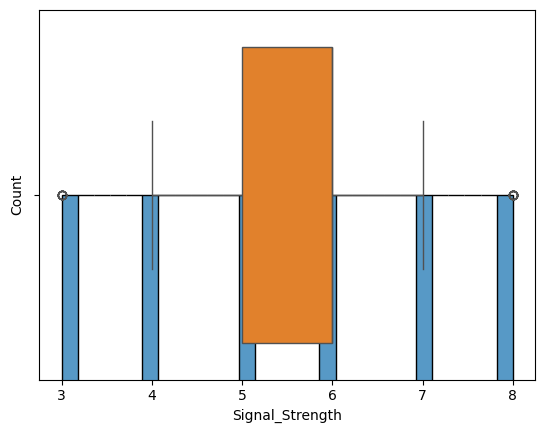

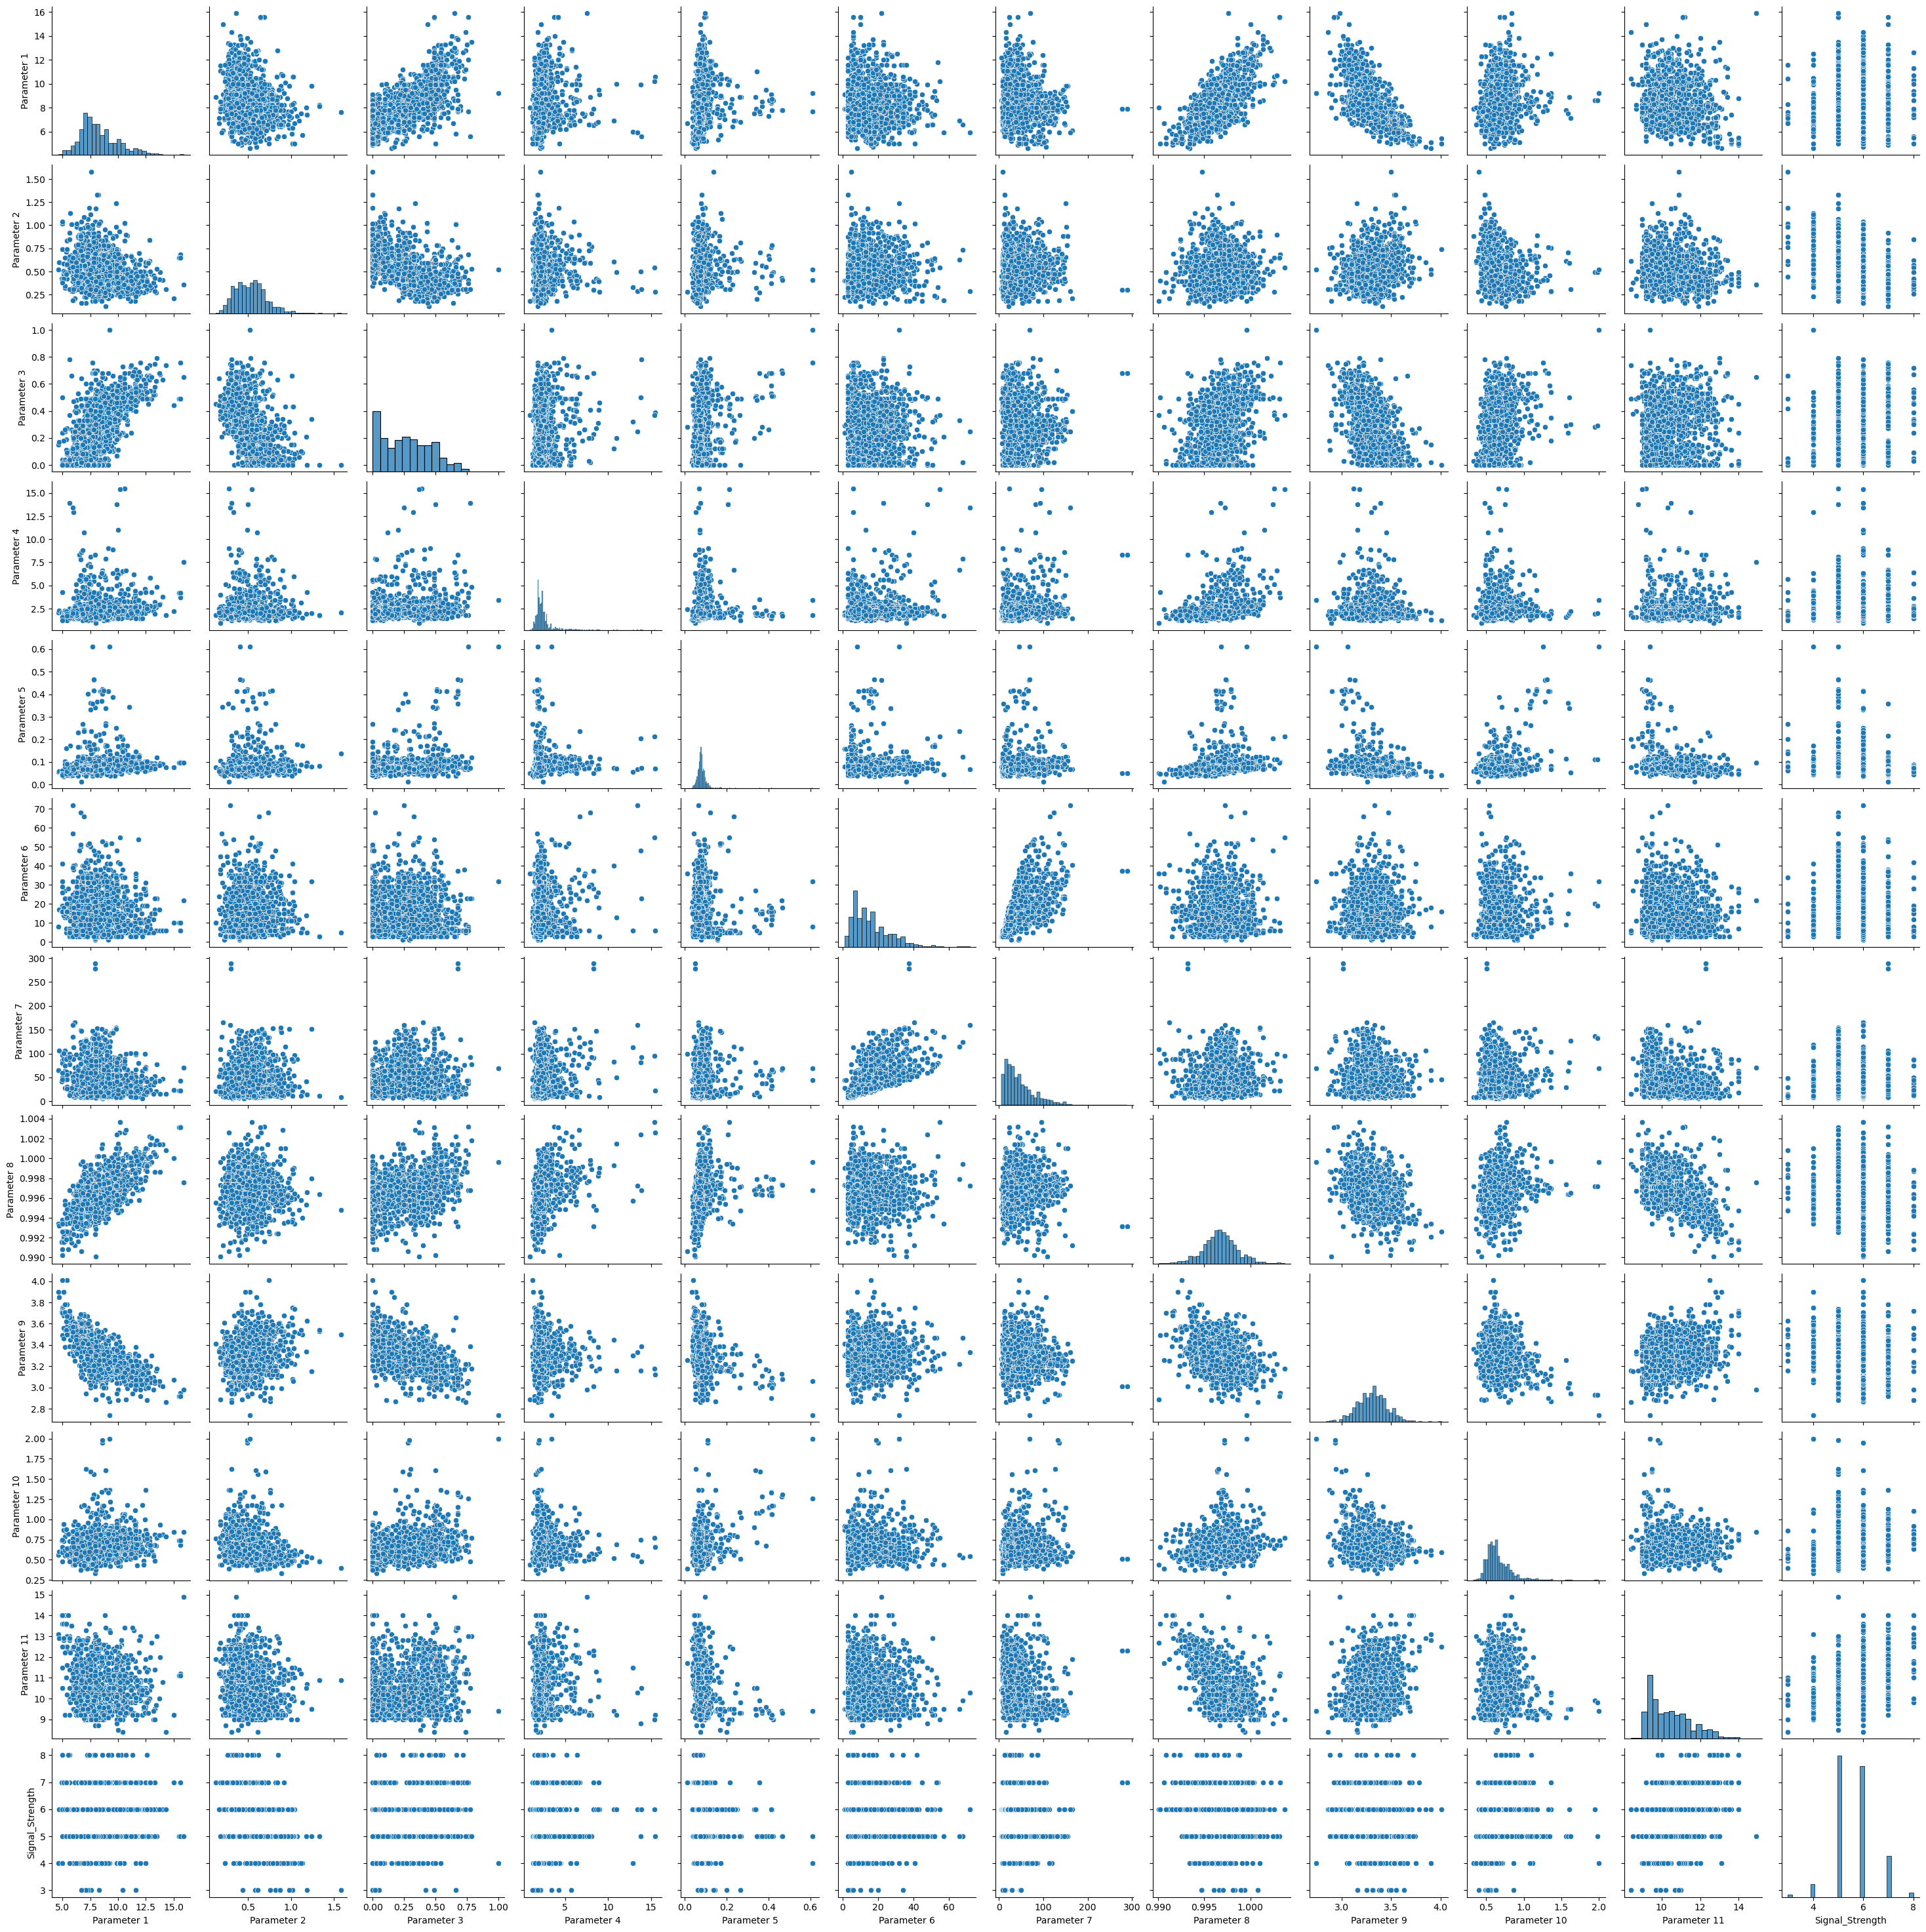

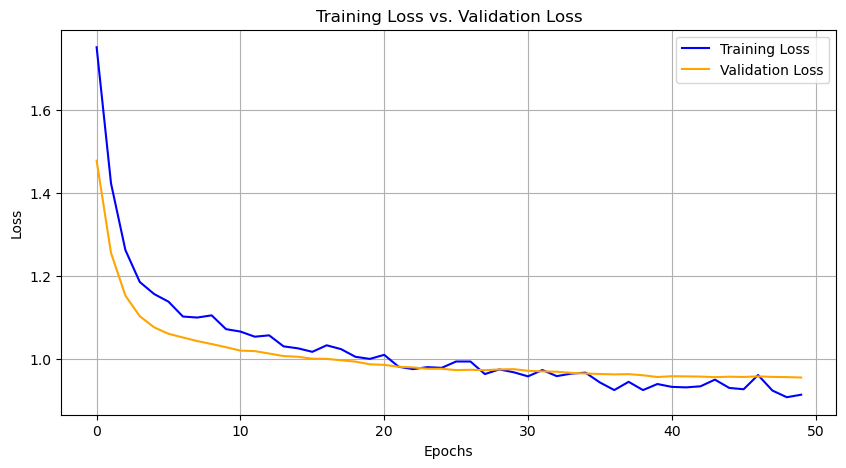

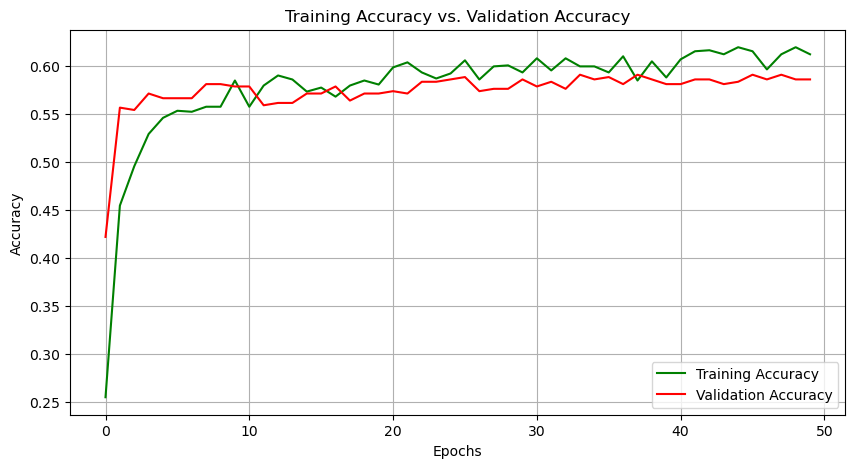

In [32]:
# Plot 1: Training Loss and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Training Accuracy and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### 3.D Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [34]:
# Define the revised architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(scaled_X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(Y_train_cat.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(scaled_X_train, Y_train_cat,
                    validation_data=(scaled_X_test, Y_test_cat),
                    epochs=100,
                    batch_size=32,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)


C:\Users\fenuj\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3200 - loss: 1.9056 - val_accuracy: 0.4804 - val_loss: 1.4824 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4772 - loss: 1.4349 - val_accuracy: 0.5221 - val_loss: 1.2892 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5109 - loss: 1.3415 - val_accuracy: 0.5441 - val_loss: 1.2307 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5337 - loss: 1.3376 - val_accuracy: 0.5466 - val_loss: 1.1975 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5485 - loss: 1.2889 - val_accuracy: 0.5588 - val_loss: 1.1771 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5514 - loss: 1.1984 - val_accuracy: 0.5588 - val_loss: 1.1626 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5422 - loss: 1.2099 - 

### 3.E Plot visuals as in Q3.C and share insights about difference observed in both the models.

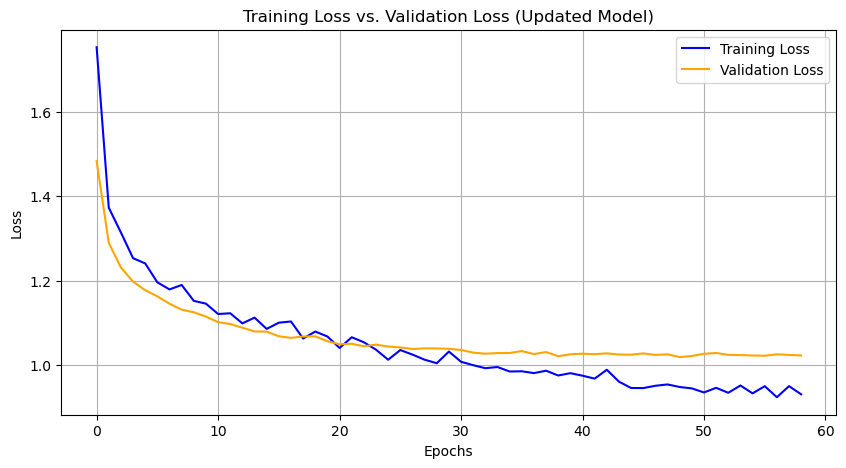

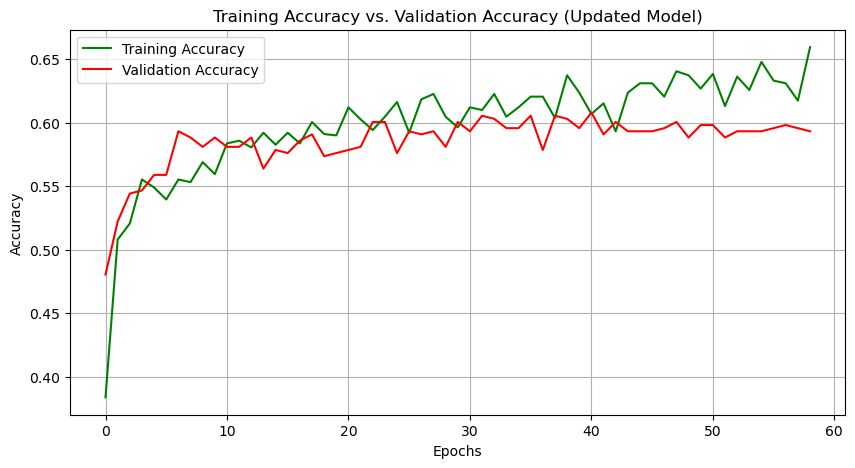

In [35]:
# Plot 1: Training Loss vs. Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training Loss vs. Validation Loss (Updated Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Training Accuracy vs. Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training Accuracy vs. Validation Accuracy (Updated Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Insights
#### Training vs. Validation Loss:
#### Initial Model:
1. The training loss decreased rapidly, but the validation loss either plateaued early or increased, indicating potential overfitting.
#### Updated Model:
1. A smoother convergence between training and validation loss suggests that regularization techniques (Dropout, L2) helped mitigate overfitting.

#### Training vs. Validation Accuracy:
#### Initial Model:
1. A significant gap between training and validation accuracy was observed, indicating poor generalization.
#### Updated Model:
1. The gap between training and validation accuracy is smaller, showing better generalization to unseen data.

#### Key Differences Observed:
#### Overfitting Reduction:

Regularization (Dropout, L2) likely reduced overfitting, evident in closer training and validation performance.
#### Smoother Convergence:

With the learning rate scheduler, loss and accuracy curves should show smoother convergence.
#### Improved Generalization:

The improved model should exhibit higher validation accuracy and lower validation loss compared to the initial model.

## Part B

### 1.A Read the .h5 file and assign to a variable.

In [47]:
import h5py
print(h5py.__version__)

3.12.1


In [49]:
ah5 = h5py.File("Autonomous_Vehicles_SVHN_single_grey1 (1).h5")

### 1.B Print all the keys from the .h5 file.


In [50]:
list(ah5.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

### 1.C Split the data into X_train, X_test, Y_train, Y_test


In [51]:
X_train_img, X_test_img, Y_train_img, Y_test_img = ah5['X_train'], ah5['X_test'], ah5['y_train'], ah5['y_test']

In [52]:
print(type(X_train_img), type(X_test_img), type(Y_train_img), type(Y_test_img))

<class 'h5py._hl.dataset.Dataset'> <class 'h5py._hl.dataset.Dataset'> <class 'h5py._hl.dataset.Dataset'> <class 'h5py._hl.dataset.Dataset'>


In [53]:
X_train_img, X_test_img, Y_train_img, Y_test_img = X_train_img[:], X_test_img[:], Y_train_img[:], Y_test_img[:]
print(type(X_train_img), type(X_test_img), type(Y_train_img), type(Y_test_img))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 2.A Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.


In [54]:
print('X train:', X_train_img.shape, '| X test:', X_test_img.shape, '| Y train:', Y_train_img.shape, '| Y test:', Y_test_img.shape)

X train: (42000, 32, 32) | X test: (18000, 32, 32) | Y train: (42000,) | Y test: (18000,)


### 2.B Visualise first 10 images in train data and print its corresponding labels.


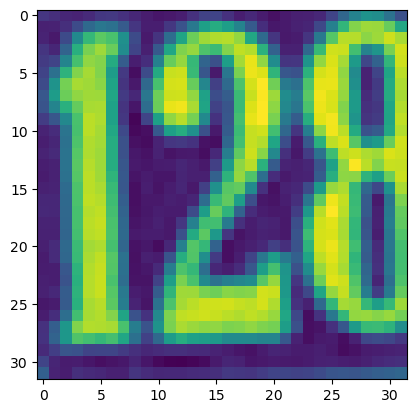


index:  0 | Label:  2
_______________________________________________________ 



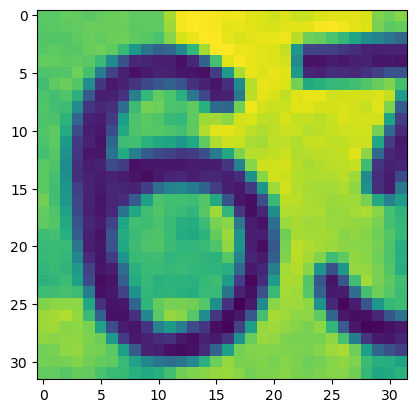


index:  1 | Label:  6
_______________________________________________________ 



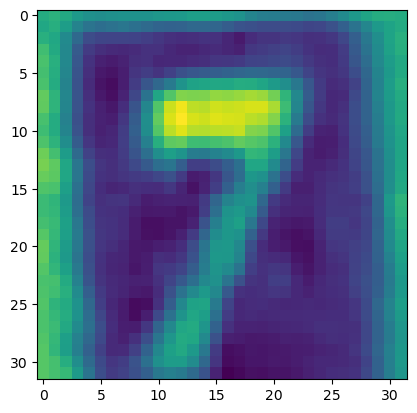


index:  2 | Label:  7
_______________________________________________________ 



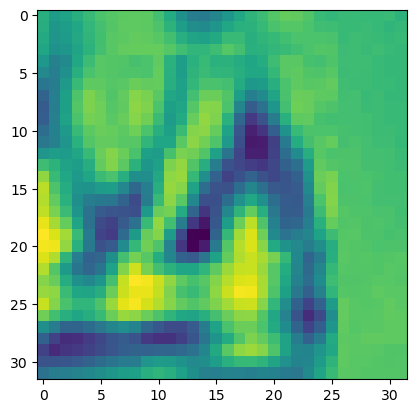


index:  3 | Label:  4
_______________________________________________________ 



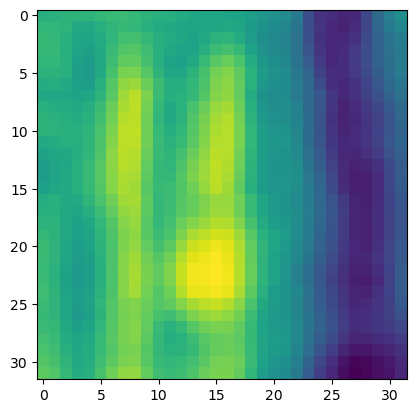


index:  4 | Label:  4
_______________________________________________________ 



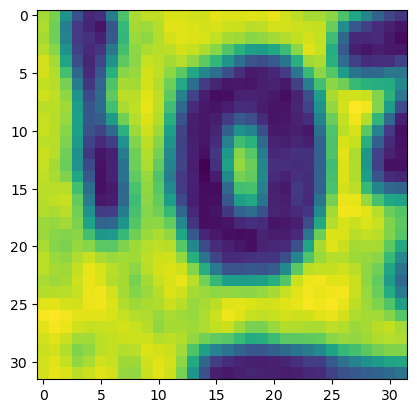


index:  5 | Label:  0
_______________________________________________________ 



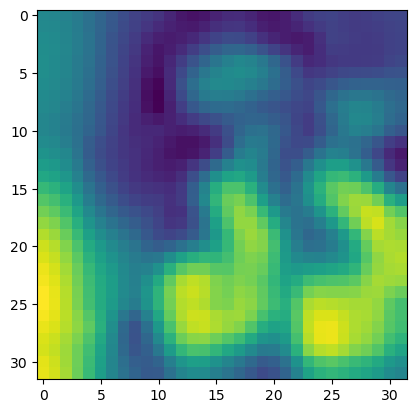


index:  6 | Label:  3
_______________________________________________________ 



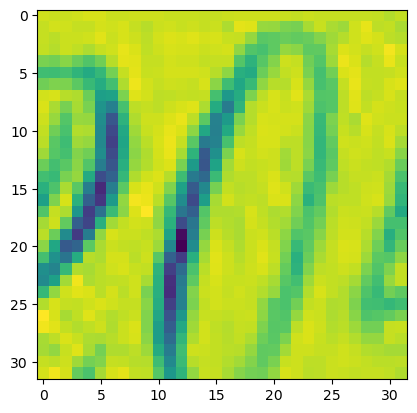


index:  7 | Label:  0
_______________________________________________________ 



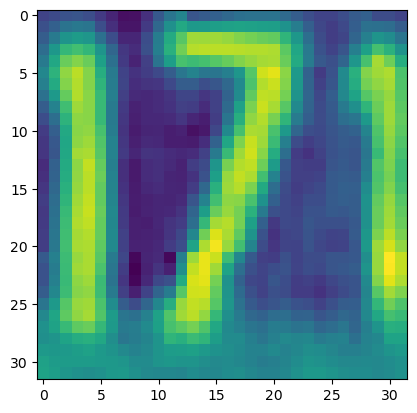


index:  8 | Label:  7
_______________________________________________________ 



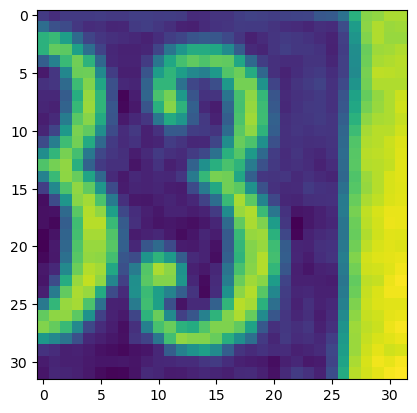


index:  9 | Label:  3
_______________________________________________________ 



In [55]:
for i in np.arange(10):
  plt.imshow(X_train_img[i])
  plt.show()
  print('\nindex: ', i, '| Label: ', Y_train_img[i])
  print('_' * 55, '\n')

### 2.C Reshape all the images with appropriate shape update the data in same variable.


In [56]:
X_train_img = X_train_img.reshape((X_train_img.shape[0], -1))
X_test_img = X_test_img.reshape((X_test_img.shape[0], -1))
print('X train:', X_train_img.shape, '| X test:', X_test_img.shape, '| Y train:', Y_train_img.shape, '| Y test:', Y_test_img.shape)

X train: (42000, 1024) | X test: (18000, 1024) | Y train: (42000,) | Y test: (18000,)


### 2.D Normalise the images i.e. Normalise the pixel values.


In [57]:
scaled_X_train_img = pd.DataFrame(scaler.fit_transform(X_train_img))
scaled_X_test_img = pd.DataFrame(scaler.fit_transform(X_test_img))

### 2.E Transform Labels into format acceptable by Neural Network


In [58]:
Y_train_img = to_categorical(Y_train_img)
Y_test_img = to_categorical(Y_test_img)

### 2.F Print total Number of classes in the Dataset.


In [59]:
print(Y_train_img.shape)

(42000, 10)


### 3.A Design a Neural Network to train a classifier.


In [62]:
model_img_1 = Sequential()

model_img_1.add(Dense(50, input_shape = (1024, )))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(50))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(50))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(50))
model_img_1.add(Activation('sigmoid'))
model_img_1.add(Dense(10))
model_img_1.add(Activation('softmax'))

In [65]:
sgd = optimizers.SGD(learning_rate = 0.01)

In [66]:
model_img_1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### 3.B Train the classifier using previously designed Architecture (Use best suitable parameters).


In [91]:
from tensorflow.keras.layers import ReLU

model_img_1.add(Dense(50))
model_img_1.add(ReLU())

In [92]:
from tensorflow.keras.layers import BatchNormalization

model_img_1.add(Dense(50))
model_img_1.add(BatchNormalization())
model_img_1.add(ReLU())

In [93]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
model_img_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
from tensorflow.keras.layers import Dropout

model_img_1.add(Dropout(0.5))

In [96]:
model_img_1.add(Dense(10))  # Final layer should have 10 neurons
model_img_1.add(Activation('softmax'))  # Use softmax for multi-class classification

In [99]:
model.add(Activation('relu'))

In [100]:
# Using ReLU activations and Adam optimizer for better results
def create_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(1024,)))
    model.add(Activation('relu'))  # Use ReLU instead of sigmoid
    model.add(Dense(50))
    model.add(Activation('relu'))  # ReLU for hidden layers
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))  # Output layer
    model.add(Activation('softmax'))  # Softmax for classification

    # Use Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Train the model
model_img_1 = create_model()
history_img_1 = model_img_1.fit(scaled_X_train_img, Y_train_img, batch_size=500, epochs=50, verbose=1)


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1065 - loss: 2.3079
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2202 - loss: 2.2079
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3750 - loss: 1.7700
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4738 - loss: 1.5425
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5250 - loss: 1.4200
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5627 - loss: 1.3308
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5854 - loss: 1.2715
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6030 - loss: 1.2271
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6180 - loss: 1.1828
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6273 - loss: 1.1666
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6333 - loss: 1.1563
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6415 - l

In [83]:
def improved_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(1024,), activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [84]:
scaled_X_train_img = X_train_img / 255.0
scaled_X_test_img = X_test_img / 255.0

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [87]:
model_img_2 = improved_model()
history_img_2 = model_img_2.fit(scaled_X_train_img, Y_train_img, batch_size=1000, epochs = 20, verbose = 1)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0978 - loss: 2.3601
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1330 - loss: 2.2900
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1894 - loss: 2.2507
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2465 - loss: 2.1613
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3360 - loss: 1.9949
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4278 - loss: 1.8019
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4791 - loss: 1.6381
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5361 - loss: 1.5045
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5603 - loss: 1.4171
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5919 - loss: 1.3441
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6032 - loss: 1.2970
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy:

### 3.C Evaluate performance of the model with appropriate metrics.


In [101]:
results_img_1 = model_img_1.evaluate(scaled_X_test_img, Y_test_img)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7462 - loss: 0.8272


### 3.D Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [103]:
history_img_1 = model_img_1.fit(scaled_X_train_img, Y_train_img, 
                                batch_size=500, epochs=10, verbose=1, 
                                validation_split=0.2)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7632 - loss: 0.7690 - val_accuracy: 0.7533 - val_loss: 0.7819
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7676 - loss: 0.7598 - val_accuracy: 0.7590 - val_loss: 0.7791
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7708 - loss: 0.7427 - val_accuracy: 0.7695 - val_loss: 0.7475
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7688 - loss: 0.7405 - val_accuracy: 0.7725 - val_loss: 0.7393
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7729 - loss: 0.7402 - val_accuracy: 0.7631 - val_loss: 0.7626
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7691 - loss: 0.7366 - val_accuracy: 0.7670 - val_loss: 0.7542
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7766 - loss: 0.7205 - val_accuracy: 0.7567 - val_loss: 0.7934
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7730 - loss: 0.7378 - val_accuracy: 0.7624 - v

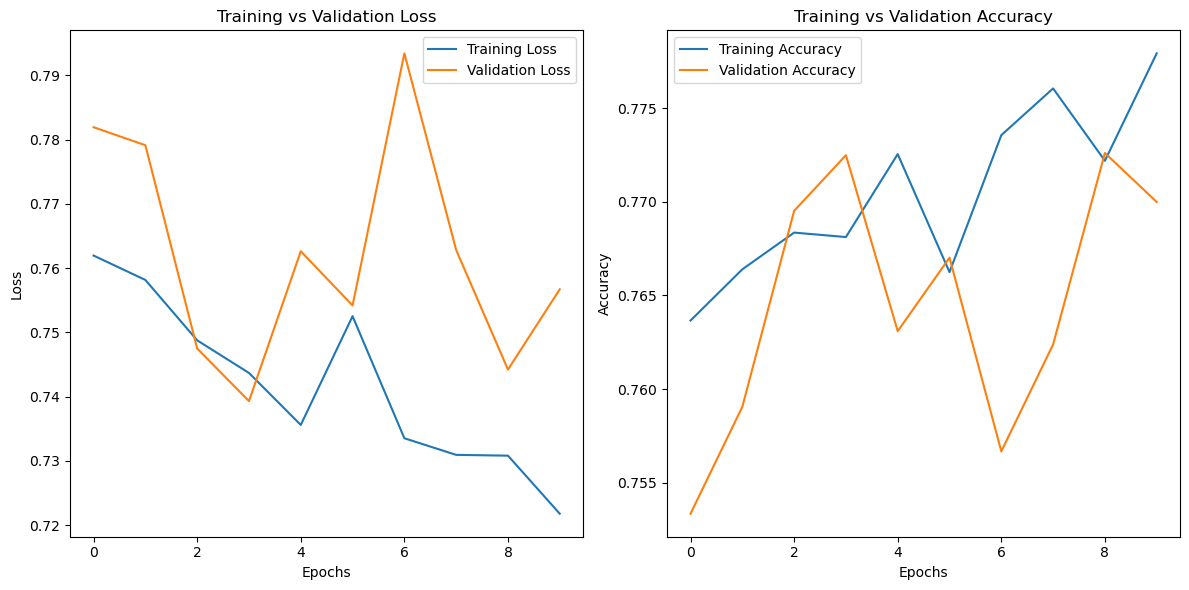

In [104]:
# Extract values from the history object
train_loss = history_img_1.history['loss']
val_loss = history_img_1.history['val_loss']
train_accuracy = history_img_1.history['accuracy']
val_accuracy = history_img_1.history['val_accuracy']

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Observations:
#### Training Loss:
The training loss should generally decrease over time as the model learns. If it doesn't decrease or plateaus at a high value, it may indicate an issue with the model architecture, data, or optimization parameters.

#### Validation Loss:
The validation loss typically tracks the model's generalization ability. If it starts increasing while the training loss decreases, it may suggest overfitting.

#### Training Accuracy:
This metric should improve over time as the model learns the patterns in the data. A consistent increase is a good sign of model improvement.

#### Validation Accuracy:
A significant gap between training and validation accuracy indicates overfitting, while similar trends in both curves show that the model generalizes well.



### Insights
#### Training vs Validation Loss

#### Overall Trend:
The training loss and validation loss both show a decreasing trend, which is expected during training. The model is learning and improving its ability to predict the target variable.

#### Validation Loss Higher:
The validation loss is consistently higher than the training loss. This is a common observation and suggests that the model is overfitting to the training data. It is performing better on the data it has seen during training but struggles to generalize to unseen data.

#### Training vs Validation Accuracy

#### Overall Trend:
Both training and validation accuracy are increasing, indicating that the model is becoming more accurate in its predictions.

#### Validation Accuracy Lower:
Similar to the loss, the validation accuracy is lower than the training accuracy. This again points to overfitting. The model is memorizing patterns in the training data rather than learning generalizable features.

The consistent gap between training and validation metrics strongly indicates overfitting.

### Recommentations

Based on the observed overfitting, I recommend implementing regularization techniques and monitoring validation performance closely during training. Early stopping can also be a valuable strategy to prevent further overfitting.